## Observations and Insights 

In [1]:
#Three Observable Trends:
#Capomulin, of the four regimens studied more deeply, has the smallest spread between first and third quartile results implying more predictable results.
#Capomulin and Ramicane have similar results in many measurements.
#Male and females are nearly equally split in the study
#Ramicane had a larger spread in Tumor Volume results with a negligbly smaller minimum and neglibly larger maximum values.

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
a = pd.read_csv("data/Mouse_metadata.csv")
b = pd.read_csv("data/Study_results.csv")
#b = b.dropna(axis=1)
merged = a.merge(b, on='Mouse ID')
merged.to_csv("data.csv", index=False)

# Display the data table for preview
data_df = pd.read_csv("data.csv")
data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Check the data for any mouse ID with duplicate time points
duplicateRows_df = data_df[data_df.duplicated(['Mouse ID','Timepoint'])]
duplicates = duplicateRows_df[['Mouse ID', 'Timepoint']]
uniquedupes = duplicates['Mouse ID'].unique()
print('Duplicate row(s) based on Mouse ID and Timepoint is Mouse:', *uniquedupes)

Duplicate row(s) based on Mouse ID and Timepoint is Mouse: g989


In [4]:
# Checking the number of mice.
count_df = data_df["Mouse ID"].unique()
count = len(count_df)

print("No. of mice:",count)

No. of mice: 249


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

print('Duplicate row(s) based on Mouse ID and Timepoint is Mouse:', *uniquedupes)


Duplicate row(s) based on Mouse ID and Timepoint is Mouse: g989


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 

b_df = (data_df.loc[data_df['Mouse ID'] == 'g989'])
b_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_data_df = data_df[data_df['Mouse ID'] != 'g989']
clean_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
unique_df = clean_data_df["Mouse ID"].unique()
count = len(unique_df)

print("No. of mice:",count)

No. of mice: 248


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM (std/(sample size squared)) of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

c_df = clean_data_df.drop(['Mouse ID', 'Sex', 'Age_months','Weight (g)','Timepoint','Metastatic Sites'], axis=1)

# Calculations
d = c_df.groupby(['Drug Regimen']).mean()
d = d.rename(columns={'Tumor Volume (mm3)': 'Mean'})

e = c_df.groupby(['Drug Regimen']).median()
e = e.rename(columns={'Tumor Volume (mm3)': 'Median'})

f = c_df.groupby(['Drug Regimen']).var()
f = f.rename(columns={'Tumor Volume (mm3)': 'Variance'})

g = c_df.groupby(['Drug Regimen']).std()
g = g.rename(columns={'Tumor Volume (mm3)': 'StDev'})

h = c_df.groupby(['Drug Regimen']).sem()
h = h.rename(columns={'Tumor Volume (mm3)': 'SEM'})

data_frames = [d, e, f, g, h]     #Create list of dataframes
summary_df = pd.concat(data_frames, join='outer', axis=1)   #Join dataframes together
summary_df

,Mean,Median,Variance,StDev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
i = c_df.groupby(['Drug Regimen']).agg({'mean','median','var','std','sem'})

j = i.rename(columns={'sem': 'SEM','mean':'Mean','var':'Variance','median':'Median','std':'StDev'})
j

Tumor Volume (mm3)                                           
                            SEM   Variance       Mean     StDev     Median
Drug Regimen                                                              
Capomulin              0.329346  24.947764  40.675741  4.994774  41.557809
Ceftamin               0.469821  39.290177  52.591172  6.268188  51.776157
Infubinol              0.492236  43.128684  52.884795  6.567243  51.820584
Ketapril               0.603860  68.553577  55.235638  8.279709  53.698743
Naftisol               0.596466  66.173479  54.331565  8.134708  52.509285
Placebo                0.581331  61.168083  54.033581  7.821003  52.288934
Propriva               0.544332  43.852013  52.320930  6.622085  50.446266
Ramicane               0.320955  23.486704  40.216745  4.846308  40.673236
Stelasyn               0.573111  59.450562  54.233149  7.710419  52.431737
Zoniferol              0.516398  48.533355  53.236507  6.966589  51.818479

## Bar and Pie Charts

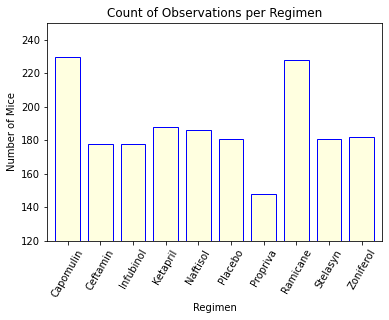

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
k = c_df.groupby(['Drug Regimen']).count()
k = k.rename(columns={'Tumor Volume (mm3)': 'Count'})

bardata = {'Drug Regimen':["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol","Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"],'Count':[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]}
mice = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]
dataFrame = pd.DataFrame(data=bardata);

# Bar chart selection
dataFrame.plot.bar(x='Drug Regimen', y='Count', legend = False, width=.75,edgecolor= ['blue'], color=['lightyellow'], rot=60, title="Count of Observations per Regimen");

# Sets the y limits
plt.ylim(120, max(mice)+20)

# Provides labels
plt.xlabel("Regimen")
plt.ylabel("Number of Mice")

plt.show(block=True)

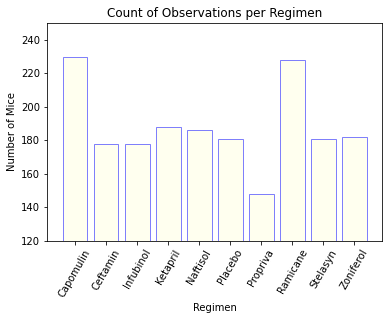

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
k = c_df.groupby(['Drug Regimen']).count()
k = k.rename(columns={'Tumor Volume (mm3)': 'Count'})

# Create an array of the mice
mice = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

# Bar chart selection
# Number of mice as y axis and Regimens as the x_axis.
x_axis = np.arange(len(mice))   # Set x axis equal to number of regimens
plt.bar(x_axis, mice, color='lightyellow', edgecolor='blue', alpha=0.5, align="center")

# X axis header locations
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol","Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"])
plt.xticks(rotation=60)

# Sets the y limits
plt.ylim(120, max(mice)+20)

# Provides labels and a title
plt.title("Count of Observations per Regimen")
plt.xlabel("Regimen")
plt.ylabel("Number of Mice")
plt.show()


In [13]:
clean_data_df.Sex.value_counts()

Male      958
Female    922
Name: Sex, dtype: int64

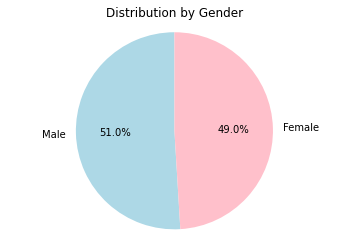

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

clean_data_df.Sex.value_counts().plot(kind='pie', autopct="%1.1f%%", startangle=90,colors=['lightblue','pink'], legend = False, title="Distribution by Gender")

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.axis('off')
plt.show()

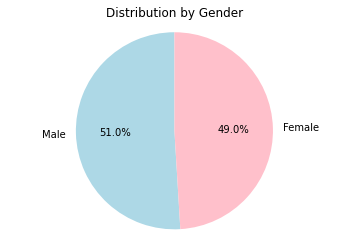

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

colors = ['lightblue','pink']
genders = ['Male', 'Female']

plt.pie(clean_data_df.Sex.value_counts(), labels=genders, colors=colors,autopct="%1.1f%%", startangle=90)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.axis('off')
plt.title('Distribution by Gender')
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Remove unnecessary rows and columns
m_df = clean_data_df.drop(['Sex', 'Age_months','Weight (g)','Metastatic Sites'], axis=1)
n_df = m_df.loc[(m_df["Drug Regimen"] == "Capomulin") | (m_df["Drug Regimen"] == "Ramicane") | (m_df["Drug Regimen"] == "Ceftamin") | (m_df["Drug Regimen"] == "Infubinol"), :]

# Number of mice in the four regimens
count2_df = n_df["Mouse ID"].unique()
count2 = len(count2_df)
print("No. of mice:",count2)

# Sort by Timpepoints based on the latest values
n_df = n_df.sort_values("Timepoint", ascending = False)
p_df = n_df.drop_duplicates(subset="Mouse ID", keep='first')
p_df


No. of mice: 100


,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
1872,z581,Infubinol,45,62.754451
800,e476,Infubinol,45,62.435404
154,c758,Ramicane,45,33.397653
440,i557,Capomulin,45,47.685963
144,m957,Capomulin,45,33.329098
...,...,...,...,...
1205,m756,Infubinol,5,47.010364
1743,x226,Ceftamin,0,45.000000
594,b447,Ceftamin,0,45.000000
1551,t573,Ceftamin,0,45.000000


In [17]:
# Remove unnecessary columns from source dataframe
r_df = p_df.drop(['Timepoint','Mouse ID'],axis=1)

# Calculate quartiles for each drug
q_df = r_df.groupby(['Drug Regimen']).quantile([.25,.5,.75]).round(2)
q_df


Tumor Volume (mm3)
Drug Regimen                         
Capomulin    0.25               32.38
             0.50               38.13
             0.75               40.16
Ceftamin     0.25               48.72
             0.50               59.85
             0.75               64.30
Infubinol    0.25               54.05
             0.50               60.17
             0.75               65.53
Ramicane     0.25               31.56
             0.50               36.56
             0.75               40.66

In [24]:
# Calculate quartiles for each drug
upper_df = r_df.groupby(['Drug Regimen']).quantile([.75]).round(2)
lower_df = r_df.groupby(['Drug Regimen']).quantile([.25]).round(2)
median_df= r_df.groupby(['Drug Regimen']).quantile([.50]).round(2)

# Merge the three dataframes and rename columns
combined_df = pd.merge(upper_df, lower_df, how='outer', on='Drug Regimen')
combined_df = pd.merge(combined_df, median_df, how='outer', on='Drug Regimen')

combined_df = combined_df.rename(columns={"Tumor Volume (mm3)_x":"Upper Quartile", "Tumor Volume (mm3)_y":"Lower Quartile","Tumor Volume (mm3)":"Median"})

# Create a new column and subtract for IQR
combined_df["IQR"] = combined_df["Upper Quartile"] - combined_df["Lower Quartile"] 

# Create new columns and calculate upper and lower bounds
combined_df["Upper Bound"] = round(combined_df["Upper Quartile"] + (1.5*combined_df["IQR"]),2)
combined_df["Lower Bound"] = round(combined_df["Lower Quartile"] - (1.5*combined_df["IQR"]),2)

combined_df


,Upper Quartile,Lower Quartile,Median,IQR,Upper Bound,Lower Bound
Drug Regimen,,,,,,
Capomulin,40.16,32.38,38.13,7.78,51.83,20.71
Ceftamin,64.30,48.72,59.85,15.58,87.67,25.35
Infubinol,65.53,54.05,60.17,11.48,82.75,36.83
Ramicane,40.66,31.56,36.56,9.10,54.31,17.91


In [25]:
# Locate the rows which contain mice on each drug and get the tumor volumes
s_df = p_df.drop(['Timepoint'],axis=1)
              
#Determine outliers using lower and upper bounds

#Lower bounds
lcap_outliers = s_df.loc[(s_df['Drug Regimen'] == "Capomulin") & (s_df['Tumor Volume (mm3)'] < 20.71), :]
lcef_outliers = s_df.loc[(s_df['Drug Regimen'] == "Ceftamin") & (s_df['Tumor Volume (mm3)'] < 25.35), :]
linf_outliers = s_df.loc[(s_df['Drug Regimen'] == "Infubinol") & (s_df['Tumor Volume (mm3)'] < 36.83), :]
lram_outliers = s_df.loc[(s_df['Drug Regimen'] == "Ramicane") & (s_df['Tumor Volume (mm3)'] < 17.91), :]

#Upper bounds
ucap_outliers = s_df.loc[(s_df['Drug Regimen'] == "Capomulin") & (s_df['Tumor Volume (mm3)'] > 51.83), :]
ucef_outliers = s_df.loc[(s_df['Drug Regimen'] == "Ceftamin") & (s_df['Tumor Volume (mm3)'] > 87.67), :]
uinf_outliers = s_df.loc[(s_df['Drug Regimen'] == "Infubinol") & (s_df['Tumor Volume (mm3)'] > 82.75), :]
uram_outliers = s_df.loc[(s_df['Drug Regimen'] == "Ramicane") & (s_df['Tumor Volume (mm3)'] > 54.31), :]

#Lists of frames
lower_frames = [lcap_outliers,lcef_outliers,linf_outliers,lram_outliers]
upper_frames = [ucap_outliers,ucef_outliers,uinf_outliers,uram_outliers]

#Concatenate all lower frames and all upper frames
lower_outliers = pd.concat(lower_frames)
upper_outliers = pd.concat(upper_frames)

#Combine upper and lower frames
comb_frames = [lower_outliers,upper_outliers]
outliers = pd.concat(comb_frames)

outliers

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
669,c326,Infubinol,36.321346


In [26]:
#Tumor volumes for each mouse in the identified Drug Regimen for plotting
cap = s_df.loc[(s_df['Drug Regimen'] == "Capomulin")]
cap1 = cap['Tumor Volume (mm3)'].to_numpy()
cap1

cef = s_df.loc[(s_df['Drug Regimen'] == "Ceftamin")]
cef1 = cef['Tumor Volume (mm3)'].to_numpy()
cef1

inf = s_df.loc[(s_df['Drug Regimen'] == "Infubinol")]
inf1 = inf['Tumor Volume (mm3)'].to_numpy()
inf1

ram = s_df.loc[(s_df['Drug Regimen'] == "Ramicane")]
ram1 = ram['Tumor Volume (mm3)'].to_numpy()
ram1

mouse_arrays = [cap1, cef1, inf1, ram1]  #Create list of arrays


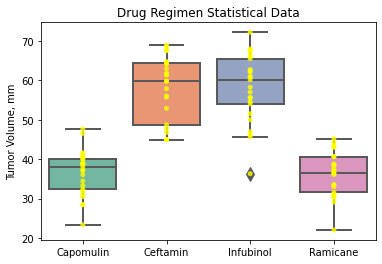

In [27]:
import seaborn as sns
treatments = ["Capomulin", "Ceftamin", "Infubinol", "Ramicane"]

# Create boxplot with large flier size for the outlier(s)
ax = sns.boxplot(data=mouse_arrays, linewidth=2, palette="Set2",fliersize=10)

# Create overlying stripplot to visualize distribution, including outlier(s)
bx = sns.stripplot(data=mouse_arrays, jitter=False, marker='o', alpha=0.8, color="yellow")

# Custom Title
ax.set_title('Drug Regimen Statistical Data')

# Custom x-axis labels
ax.set_xticklabels(["Capomulin", "Ceftamin", "Infubinol", "Ramicane"])
ax.set(ylabel = "Tumor Volume, mm")

# Remove top axes
ax.get_xaxis().tick_bottom()


## Line and Scatter Plots

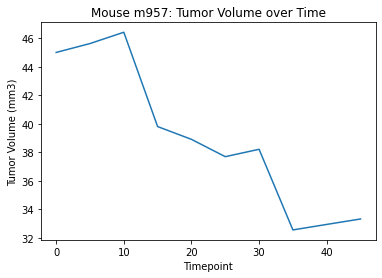

In [35]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Data retrieval for Mouse ID = m957
x_df = clean_data_df.drop(['Weight (g)', 'Sex', 'Age_months','Metastatic Sites'], axis=1)
x_df = x_df.loc[(m_df["Drug Regimen"] == "Capomulin"), :]
x_df = x_df.loc[(m_df["Mouse ID"] == "m957"), :]

# Create line plot
x_df.set_index('Timepoint')['Tumor Volume (mm3)'].plot();

# labels and Title
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse m957: Tumor Volume over Time')

# Remove top axes
ax.get_xaxis().tick_bottom()

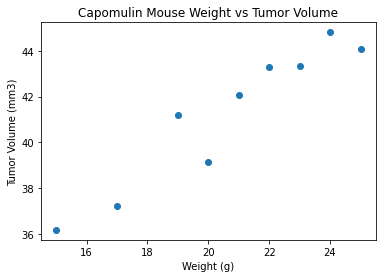

In [36]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Data retrieval and remove unnecessary rows and columns
t_df = clean_data_df.drop(['Mouse ID', 'Timepoint', 'Sex', 'Age_months','Metastatic Sites'], axis=1)
t_df = t_df.loc[(m_df["Drug Regimen"] == "Capomulin"), :]

v_df = t_df.rename(columns={'Weight (g)': 'Weight', 'Tumor Volume (mm3)': 'Vol' })
w_df = v_df.groupby(['Weight']).mean().reset_index()

# Create arrays
Volume = w_df['Vol'].to_numpy()
Weight = w_df['Weight'].to_numpy() 

# Create scatter plot
plt.scatter(Weight, Volume)

# labels and Title
plt.title('Capomulin Mouse Weight vs Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

# Remove top axes
ax.get_xaxis().tick_bottom()


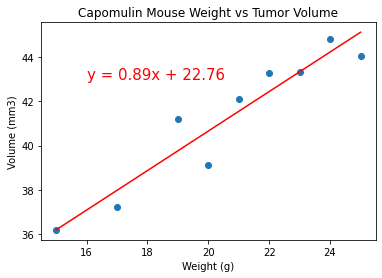

In [40]:
# Create scatter plot
plt.scatter(Weight, Volume)

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(Weight, Volume)
regress_values = Weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Add regression line
plt.plot(Weight,regress_values,"r-")

# Add labels and equation to plot
plt.annotate(line_eq,(16,43),fontsize=15,color="red")
plt.title('Capomulin Mouse Weight vs Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Volume (mm3)')

# Remove top axes
ax.get_xaxis().tick_bottom()

## Correlation and Regression

In [41]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
import scipy.stats
from scipy.stats import linregress

pearsonr = scipy.stats.pearsonr(Weight, Volume)    # Pearson's r
print("Pearson's r:", pearsonr)
print('************************************************************')
spearmanr = scipy.stats.spearmanr(Weight, Volume)   # Spearman's rho
print("Spearman's rho:")
print("Spearman's rho correlation is", round(spearmanr.correlation,4))
print("Spearman's rho pvalue is", round(spearmanr.pvalue,4))
print('************************************************************')
kendalltau = scipy.stats.kendalltau(Weight, Volume)  # Kendall's tau
print("Kendall's Tau:")
print("Kendall's Tau correlation is", round(kendalltau.correlation,4))
print("Kendall's Tau pvalue is", round(kendalltau.pvalue,4))
print('************************************************************')
linear_regress = scipy.stats.linregress(Weight, Volume)
print("Linear Regression:")
print("Linear Regression slope is", round(linear_regress.slope,4))
print("Linear Regression intercept is", round(linear_regress.intercept,4))
print("Linear Regression r value is", round(linear_regress.rvalue,4))
print("Linear Regression p value is", round(linear_regress.pvalue,4))
print("Linear Regression std error is", round(linear_regress.stderr,4))

Pearson's r: (0.9505243961855269, 8.449451040646294e-05)
************************************************************
Spearman's rho:
Spearman's rho correlation is 0.9667
Spearman's rho pvalue is 0.0
************************************************************
Kendall's Tau:
Kendall's Tau correlation is 0.8889
Kendall's Tau pvalue is 0.0002
************************************************************
Linear Regression:
Linear Regression slope is 0.8948
Linear Regression intercept is 22.7642
Linear Regression r value is 0.9505
Linear Regression p value is 0.0001
Linear Regression std error is 0.1105
